In [1]:
from kqc_custom import generate_dependent_sample
from SA_ver2 import SimulatedAnnealing as SA
import matplotlib.pyplot as plt
from SA_basefunctions import get_QB as qb
import numpy as np
import pandas as pd

In [2]:
# 데이터 불러오기
data =  pd.read_csv(('csv/전체데이터(113개동).csv'),index_col=0)
data_price = pd.read_csv(('csv/월별동별평균가격(113개동).csv'),index_col=0)
data_price_change = pd.read_csv(('csv/월별동별평균가격변화율(113개동).csv'),index_col=0)

In [3]:
# 무위험 이자율 + 
data_seoul = pd.read_csv(('csv/서울시전월대비가격변화율.csv'),index_col=0)
data_risk = pd.read_csv(('csv/무위험만기이자수익률(국고채 3년).csv'),index_col=0)

In [4]:
data_price_change

,신내동,문래동3가,옥수동,휘경동,답십리동,신길동,고척동,방학동,가양동,방배동,...,하계동,서초동,시흥동,신도림동,불광동,금호동1가,수색동,홍은동,우면동,종암동
1,-0.080720,-0.156774,0.011721,-0.063545,0.082297,0.394790,-0.043526,0.051611,0.032827,0.198089,...,0.013177,0.652592,0.003870,-0.250777,0.033961,0.063326,-0.046875,0.094138,0.253235,-0.090766
2,0.176547,0.126996,0.124024,0.008929,0.005154,-0.122238,-0.343329,-0.026184,-0.078333,-0.108090,...,0.195568,-0.231124,0.061742,0.207464,0.112809,0.091902,0.016393,0.030504,0.199412,-0.051960
3,-0.087963,0.101102,-0.138423,0.182965,-0.003032,0.195424,0.400487,0.121840,0.061980,0.003362,...,0.058816,-0.000089,0.013383,-0.009527,-0.114976,-0.069518,0.012903,0.197942,0.000000,0.012456
4,-0.015050,0.055868,-0.089162,-0.120884,-0.024204,-0.137913,0.181865,-0.120002,0.175581,0.084887,...,-0.079212,0.135942,-0.059675,-0.108275,0.006463,0.062332,-0.022824,-0.071803,-0.386923,0.005249
5,-0.016784,-0.155543,0.215233,0.313110,-0.048761,0.019793,-0.034712,0.089072,-0.132248,-0.091445,...,0.056200,-0.149454,0.006242,-0.030765,0.078421,-0.037173,-0.008419,0.031852,0.273526,0.025198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.016535,0.254237,0.480163,1.082958,0.245610,-0.161177,-0.250000,0.039384,-0.209944,-0.223682,...,-0.163921,-0.486263,-0.036012,0.057177,0.548091,0.415638,0.284314,-0.070175,-0.059783,0.235207
116,-0.171343,-0.275104,-0.237801,-0.136364,0.015511,-0.136160,0.064599,-0.577592,-0.223069,-0.094058,...,-0.155172,1.204297,-0.105324,-0.497630,-0.240108,0.002253,-0.308353,0.009771,-0.498555,0.127480
117,0.067532,0.224779,0.025586,0.266667,0.369686,0.211370,-0.050728,1.091260,0.520686,0.263395,...,0.315379,-0.518559,-0.004740,0.491260,-0.015087,-0.361902,0.639758,-0.166786,0.829971,-0.286000
118,0.130927,-0.354642,-0.088091,-0.070959,0.013246,0.422610,0.000511,-0.027047,-0.216176,0.235392,...,-0.046323,1.270131,0.151027,0.073123,0.234574,0.256818,-0.276923,0.237859,-0.135433,0.060691


In [5]:
data_price

,신내동,문래동3가,옥수동,휘경동,답십리동,신길동,고척동,방학동,가양동,방배동,...,하계동,서초동,시흥동,신도림동,불광동,금호동1가,수색동,홍은동,우면동,종암동
0,25134.782609,51982.914319,51850.000000,29900.000000,30560.000000,25214.285714,31821.428571,24827.272727,23226.666667,69497.058824,...,22892.352941,52763.636364,24479.166667,49891.666667,37175.000000,36583.333333,32000.000000,25966.666667,43242.666667,38805.555556
1,23105.909091,43833.333333,52457.750000,28000.000000,33075.000000,35168.625000,30436.363636,26108.620690,23989.130435,83263.636364,...,23194.000000,87196.750000,24573.913043,37380.000000,38437.500000,38900.000000,30500.000000,28411.111111,54193.220927,35283.333333
2,27185.185185,49400.000000,58963.750000,28250.000000,33245.454545,30869.666667,19986.666667,25425.000000,22110.000000,74263.636364,...,27730.000000,67043.478261,26091.153846,45135.000000,42773.583333,42475.000000,31000.000000,29277.777778,65000.000000,33450.000000
3,24793.888889,54394.444444,50801.818182,33418.750000,33144.642857,36902.352941,27991.071429,28522.777778,23480.370370,74513.333333,...,29360.975610,67037.500000,26440.322581,44705.000000,37855.647059,39522.222222,31400.000000,35073.076923,65000.000000,33866.666667
4,24420.750000,57433.333333,46272.250000,29378.947368,32342.424242,31813.043478,33081.677419,25100.000000,27603.076923,80838.571429,...,27035.238095,76150.710145,24862.500000,39864.583333,38100.300000,41985.714286,30683.333333,32554.741935,39850.000000,34044.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,63355.555556,185000.000000,242500.000000,77000.000000,54036.842105,75550.000000,64500.000000,58237.500000,86333.333333,127614.285714,...,67666.666667,63476.666667,63486.666667,119566.666667,92750.000000,172000.000000,114625.000000,74200.000000,173000.000000,110866.666667
116,52500.000000,134105.843904,184833.333333,66500.000000,54875.000000,65263.125000,68666.666667,24600.000000,67075.000000,115611.111111,...,57166.666667,139921.428571,56800.000000,60066.666667,70480.000000,172387.445652,79280.000000,74925.000000,86750.000000,125000.000000
117,56045.454545,164250.000000,189562.419721,84233.333333,75161.538462,79057.777778,65183.333333,51445.000000,102000.000000,146062.500000,...,75195.833333,67363.855422,56530.769231,89575.000000,69416.666667,110000.000000,130000.000000,62428.571429,158750.000000,89250.000000
118,63383.333333,106000.000000,172863.636364,78256.250000,76157.142857,112468.421053,65216.666667,50053.571429,79950.000000,180444.444444,...,71712.500000,152924.750000,65068.421053,96125.000000,85700.000000,138250.000000,94000.000000,77277.777778,137250.000000,94666.666667


In [6]:
data_risk

,"국고채(3년,평균)"
계약날짜,
201207,0.0301
201208,0.0283
201209,0.0281
201210,0.0278
201211,0.0280
...,...
202201,0.0206
202202,0.0229
202203,0.0237


In [7]:
# 119(기간) x 113(동) 
data = data_price_change

In [8]:
# 119 x 1
data_seoul

,거래금액(만원)
계약날짜,
201207,0.026648
201208,-0.071126
201209,0.099782
201210,0.005309
201211,0.023943
...,...
202201,-0.108654
202202,0.000642
202203,0.043948


In [9]:
# Test vs Training :: 7 - 3
training_data = data_price_change[:84]
test_data = data_price_change[84:]

In [11]:
# 회귀계수로 베타값들 구하기
# 전체 베타

beta = []
for i in range(113) :
    beta.append( np.polyfit( data_seoul["거래금액(만원)"]-data_risk["국고채(3년,평균)"],data[data.columns[i]]-data_risk["국고채(3년,평균)"].values  ,1 )[0] )
    

# training 베타
beta_training = []
for i in range(113) :
    beta_training.append( np.polyfit( data_seoul["거래금액(만원)"][:84]-data_risk["국고채(3년,평균)"][:84],data[data.columns[i]][:84]-data_risk["국고채(3년,평균)"][:84].values  ,1 )[0] )

# test 베타
beta_test = []
for i in range(113) :
    beta_test.append( np.polyfit( data_seoul["거래금액(만원)"][84:]-data_risk["국고채(3년,평균)"][84:],data[data.columns[i]][84:]-data_risk["국고채(3년,평균)"][84:].values  ,1 )[0] )    

In [10]:
# 월별 수익률의 평균
np.mean(training_data).index

/opt/homebrew/Caskroom/miniforge/base/envs/QAOA/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '신길동', '고척동', '방학동', '가양동', '방배동',
       ...
       '하계동', '서초동', '시흥동', '신도림동', '불광동', '금호동1가', '수색동', '홍은동', '우면동',
       '종암동'],
      dtype='object', length=113)

In [12]:
# Risk Free - Rate 
risk_free_rate = np.mean( data_risk[84:] )

국고채(3년,평균)    0.014071
dtype: float64

In [13]:
Market_risk_premium = []
for i in range(113):
    Market_risk_premium.append ( np.mean(training_data)[i] - np.mean( data_risk[84:] ) )

In [56]:
len(Market_risk_premium)

113

ERS ? 

In [15]:
# Expected Return on a Security
ERS = np.array(beta_training)*np.array( Market_risk_premium ).T + np.array( Market_risk_premium ).T
ERS = ERS.T

In [17]:
import plotly.express as px
import chart_studio.plotly as py
# import plotly.graph_objects as go
fig = px.line(ERS)
py.iplot(fig)

In [57]:
# plotly 를 html로 host 하기위해서 추가해야되는 부분 
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [58]:
username = '815choyunsin'
api_key = 'AX35ZFK83sqMoQ7QxKTZ'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [59]:
# HTML print 
py.plot(fig, filename = '동의 ERS 의 값 line plot', auto_open=True)

'https://plotly.com/~815choyunsin/17/'

In [60]:
# embed 
tls.get_embed('https://plotly.com/~815choyunsin/17/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~815choyunsin/17.embed" height="525" width="100%"></iframe>'

In [24]:
# 이상값 찾는 부분 
type(data)
dong = list(data_price.columns)

In [25]:
# 이상치는 여기서 26 과 87임 
print(f'첫번째 이상치 : {dong[26]},  두번째 이상치 : {dong[87]}')

첫번째 이상치 : 한남동,  두번째 이상치 : 서교동


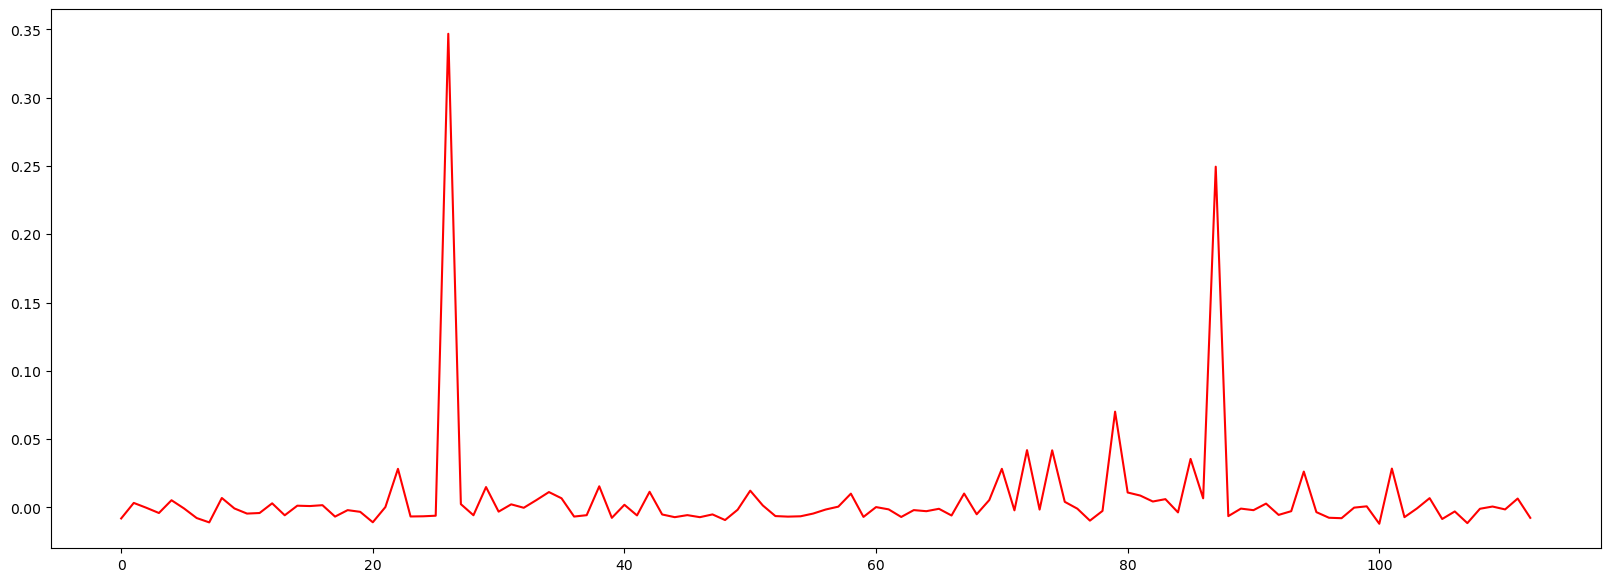

In [15]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.plot(ERS,color="Red")
#plt.plot(beta_test,color="Blue")

In [62]:
# 베타와 Q 구성
beta_training = np.array(beta_training)
Q=training_data.corr()

lst = [60, 60, 60, 60, 60, 120, 120, 120, 120, 120, 220, 220, 220, 220, 220]

#lst = [30, 50, 100]
k=2
alpha=0.9
tau=1
ld = 0.5

In [63]:
X  = training_data
X.columns = range(0,113)
y=data_seoul[:84]

In [64]:
## SA 실험 진행
simulatedannealing = SA(X, y, lst, k, alpha, tau, Q = Q, Beta = beta_training, Lambda = ld, constraint = 10,condition = [0,1,2,3,4])

#simulatedannealing = SA(X, data_seoul[:84], lst, k, alpha, tau, Q = Q, Beta = beta_training, Lambda = ld, constraint = 10,condition = [0, 1])
sa_result = simulatedannealing.equal()

/Users/yscho/sourcetree/2022-2_QAOA_final/00_application/source/SA_ver2.py:41: RuntimeWarning:

overflow encountered in exp



In [65]:
sa_result = simulatedannealing.equal()

In [66]:
sa_result

,0,1,2,3,4,5,48,87,97,103
1,-0.080720,-0.156774,0.011721,-0.063545,0.082297,0.394790,-0.155908,0.410512,-0.063254,0.013177
2,0.176547,0.126996,0.124024,0.008929,0.005154,-0.122238,-0.040567,-0.561189,-0.025932,0.195568
3,-0.087963,0.101102,-0.138423,0.182965,-0.003032,0.195424,0.062385,0.989796,0.001531,0.058816
4,-0.015050,0.055868,-0.089162,-0.120884,-0.024204,-0.137913,-0.109204,-0.182051,-0.002290,-0.079212
5,-0.016784,-0.155543,0.215233,0.313110,-0.048761,0.019793,0.209466,3.498686,0.094923,0.056200
...,...,...,...,...,...,...,...,...,...,...
80,-0.230061,-0.145650,-0.058065,-0.067528,0.486032,-0.079340,-0.112081,-0.524953,-0.092780,-0.026351
81,0.128287,0.041762,0.020369,-0.001604,0.319013,0.557364,0.037008,1.028986,0.073306,-0.100788
82,-0.045808,0.047776,-0.091299,-0.009746,0.039800,-0.131855,0.018601,0.490476,-0.056780,-0.148940
83,0.036937,0.259119,0.111763,-0.016189,-0.217436,0.060417,0.033542,0.081333,0.008210,0.394498


In [69]:
# SA 로 선정된 구들의 수익률
sa_result.columns
selected=test_data[data_price_change.columns[sa_result.columns]]

In [70]:
selected

,신내동,문래동3가,옥수동,휘경동,답십리동,신길동,진관동,서교동,미아동,하계동
85,0.110963,-0.023286,0.041054,0.047152,0.155196,0.754574,0.080416,0.261175,0.020382,-0.008212
86,0.068406,0.069750,0.047524,-0.066929,0.002260,-0.024674,-0.032859,0.018607,-0.000811,-0.052160
87,-0.019048,0.061353,0.031511,0.064317,-0.063332,0.001722,0.076770,-0.288309,0.073749,0.091892
88,0.057670,-0.061788,-0.012915,0.043387,0.046711,0.014940,-0.068168,0.283837,0.056106,0.029620
89,-0.008292,-0.015744,0.020063,0.005633,-0.030783,-0.066178,-0.020532,0.231093,-0.009990,0.022252
90,0.003421,-0.035319,-0.023425,-0.003901,-0.037437,0.085412,0.011393,0.009465,-0.044354,-0.033516
91,-0.015924,0.047235,-0.037551,0.026060,-0.058039,-0.073232,-0.010333,-0.071316,-0.009210,-0.021468
92,-0.001886,0.036789,0.001485,0.004493,-0.072677,0.090241,0.039772,-0.053674,0.056613,0.092428
93,0.037219,-0.000926,0.078356,-0.027859,0.078894,-0.027675,0.038419,0.338912,0.023872,-0.005025
94,0.013883,-0.127188,0.167252,0.009071,0.118794,0.029953,-0.030464,-0.154531,-0.031778,-0.138610


In [71]:
simulatedannealing = SA(X, y, lst, k, alpha, tau, Q = Q, Beta = beta_training, Lambda = ld, constraint = 10,condition = [0,1,2,3,4])
sa_result = simulatedannealing.equal()

/Users/yscho/sourcetree/2022-2_QAOA_final/00_application/source/SA_ver2.py:41: RuntimeWarning:

overflow encountered in exp



In [72]:
selected.columns

# 지금 이거 실행시간이 2.5초 이니깐 간단하게 실행이 가능할려나 ? 

Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '신길동', '진관동', '서교동', '미아동',
       '하계동'],
      dtype='object')

In [73]:
## 10번 반복
sa_profit_list = []
test_data = data_price_change[84:]
selected_list = []
for l in range (10):
    simulatedannealing = SA(X, y, lst, k, alpha, tau, Q = Q, Beta = beta_training, Lambda = ld, constraint = 10,condition = [0,1,2,3,4])
    sa_result = simulatedannealing.equal()
    selected=test_data[data_price_change.columns[sa_result.columns]]
    selected_list.append( selected.columns )
    profit = []
    for j in range(len(selected.T)) :
        a=1
        for i in range (35):
            test_data2=selected+1
            a=a* test_data2.iloc[i,j] 
        profit.append(a)
    sa_profit=np.sum(profit)
    
    sa_profit_list.append(sa_profit)

In [74]:
selected_list

# 간단하게 구성해보자->

[Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '청량리동', '역삼동', '신천동', '망원동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '신길동', '진관동', '서교동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '신길동', '진관동', '서교동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '신길동', '진관동', '서교동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '신길동', '진관동', '서교동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '신길동', '진관동', '서교동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '신길동', '진관동', '서교동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '청량리동', '역삼동', '신천동', '망원동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '청량리동', '일원동', '역삼동', '망원동',
        '하계

In [75]:
##  수익률 만 이용
c_profit = []

for j in range(len ( training_data.T.index)) :
    a=1
    for i in range (84):
        training_data2=training_data+1
        a=a*np.array( training_data2[training_data.T.index[j]] )[i]
    
    c_profit.append(a)

    
only_profit=pd.concat([ pd.DataFrame(training_data.T.index).T , pd.DataFrame(c_profit).T] ).T
only_profit.columns = ["names","profit"]
only_profit_result=only_profit.sort_values(by=["profit"],axis=0)
only_profit_result
random_list=only_profit_result[-20:]

In [39]:
import random as random

### SA 실험 1 

최고 수익률 list -> demo 

In [76]:
profit_random = []
number_list = list(range(113))
# number_list <- 최고 수익률 top 20 
#own_list = [1,2,3,4,5]

number_list = list( number_list )
for l in range(10) : 
    f_profit = []
    ran_number = random.sample(number_list,5)
    ran_number.append(1)
    ran_number.append(2)
    ran_number.append(3)
    ran_number.append(4)
    ran_number.append(5)
    ran_number = ran_number
    for j in range(10) :
        a=1
        
        for i in range (35):
            test_data2=test_data+1
            a=a*test_data2.iloc[i,ran_number[j]] 
            
        f_profit.append(a)
        random_profit = np.sum(f_profit) 
        
    profit_random.append(random_profit)

In [41]:
profit_random = []
number_list = list(range(113))
# number_list <- 최고 수익률 top 20 
own_list = [1,2,3,4,5]

number_list = list( number_list )
for l in range(10) : 
    f_profit = []
    ran_number = random.sample(number_list,5)
    ran_number.append(own_list[0])
    ran_number.append(own_list[1])
    ran_number.append(own_list[2])
    ran_number.append(own_list[3])
    ran_number.append(own_list[4])
    ran_number = ran_number
    for j in range(10) :
        a=1
        
        for i in range (35):
            test_data2=test_data+1
            a=a*test_data2.iloc[i,ran_number[j]] 
            
        f_profit.append(a)
        random_profit = np.sum(f_profit) 
        
    profit_random.append(random_profit)

In [77]:
profit_random

[15.300111110876037,
 15.045720923079484,
 15.58285857330144,
 14.58738524006489,
 16.529778088377334,
 14.686630265133592,
 14.8307418263334,
 14.724737922422221,
 16.93282298765615,
 15.946829209449104]

In [43]:
np.mean(profit_random)

14.938536001562401

In [44]:
np.mean(sa_profit_list)

15.52548837525543

([<matplotlib.axis.XTick at 0x173c30be0>], [Text(1, 0, '')])

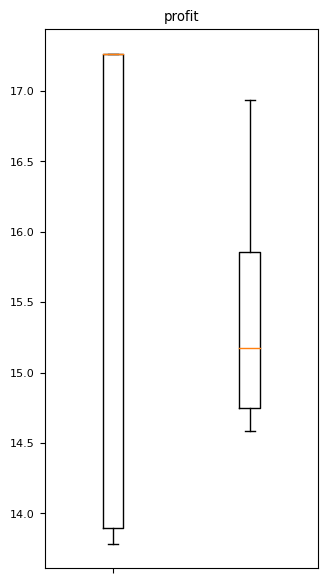

In [78]:
plt.subplot(131)
plt.title("profit")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 8
plt.boxplot([sa_profit_list,profit_random])
#plt.boxplot([profit_random])
plt.xticks([1], [''])

In [87]:
'''
    실험 1 부분 
    기본 SA 에서 추가한 부분 
    
'''
# plotly를 위해서 df 를 만들어줘야됨 
df_box1 = pd.DataFrame()
df_box1['sa_profit_list'] = sa_profit_list
df_box1['profit_random'] = profit_random

In [88]:
# box plot in plotly 
fig_box1 = px.box(df_box1)
py.iplot(fig_box1)

In [81]:
profit_random

[15.300111110876037,
 15.045720923079484,
 15.58285857330144,
 14.58738524006489,
 16.529778088377334,
 14.686630265133592,
 14.8307418263334,
 14.724737922422221,
 16.93282298765615,
 15.946829209449104]

In [80]:
sa_profit_list

[13.785576519538296,
 17.26540023097256,
 17.26540023097256,
 17.26540023097256,
 17.26540023097256,
 17.26540023097256,
 17.26540023097256,
 13.785576519538296,
 14.21599463985286,
 13.785576519538296]

In [46]:
#### 1 번 모델 - 수익률 평균 때리기
mu_for_model_1 = np.mean( data_price_change[:84] )
mu_for_model_1 = np.array( mu_for_model_1 )

/opt/homebrew/Caskroom/miniforge/base/envs/QAOA/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [47]:
# 베타와 Q 구성
beta_training = np.array(beta_training)
Q=training_data.corr()

lst = [60, 60, 60, 60, 60, 120, 120, 120, 120, 120, 220, 220, 220, 220, 220]

#lst = [30, 50, 100]
k=2
alpha=0.9
tau=1
ld = 0.5

In [48]:
## 10번 반복

sa_profit_list = []
test_data = data_price_change[84:]
selected_list = []
for l in range (10):
    simulatedannealing = SA(X, y, lst, k, alpha, tau, Q = Q, Beta =mu_for_model_1, Lambda = ld, constraint = 10,condition = [0,1,2,3,4])
    sa_result = simulatedannealing.equal()
    selected=test_data[data_price_change.columns[sa_result.columns]]
    selected_list.append( selected.columns )
    profit = []
    for j in range(len(selected.T)) :
        a=1
        for i in range (35):
            test_data2=selected+1
            a=a* test_data2.iloc[i,j] 
        profit.append(a)
    sa_profit=np.sum(profit)
    
    sa_profit_list.append(sa_profit)

/Users/yscho/sourcetree/2022-2_QAOA_final/00_application/source/SA_ver2.py:41: RuntimeWarning:

overflow encountered in exp



In [49]:
selected_list

[Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '신천동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '신천동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '신천동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '신천동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '신천동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '신천동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '신천동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '신천동', '미아동',
        '하계동'],
       dtype='object'),
 Index(['신내동', '문래동3가', '옥수동', '휘경동', '답십리동', '진관동', '청량리동', '미아동', '하계동',
     

In [50]:
##  수익률 만 이용
c_profit = []

for j in range(len ( training_data.T.index)) :
    a=1
    for i in range (84):
        training_data2=training_data+1
        a=a*np.array( training_data2[training_data.T.index[j]] )[i]
    
    c_profit.append(a)

    
only_profit=pd.concat([ pd.DataFrame(training_data.T.index).T , pd.DataFrame(c_profit).T] ).T
only_profit.columns = ["names","profit"]
only_profit_result=only_profit.sort_values(by=["profit"],axis=0)
only_profit_result
random_list=only_profit_result[-20:]

In [51]:
profit_random = []
number_list = list(range(113))
# number_list <- 최고 수익률 top 20 
own_list = [0,1,2,3,4]

number_list = list( number_list )
for l in range(10) : 
    f_profit = []
    ran_number = random.sample(number_list,5)
    ran_number.append(own_list[0])
    ran_number.append(own_list[1])
    ran_number.append(own_list[2])
    ran_number.append(own_list[3])
    ran_number.append(own_list[4])
    ran_number = ran_number
    for j in range(10) :
        a=1
        
        for i in range (35):
            test_data2=test_data+1
            a=a*test_data2.iloc[i,ran_number[j]] 
            
        f_profit.append(a)
        random_profit = np.sum(f_profit) 
        
    profit_random.append(random_profit)

([<matplotlib.axis.XTick at 0x2acdd3b50>], [Text(1, 0, '')])

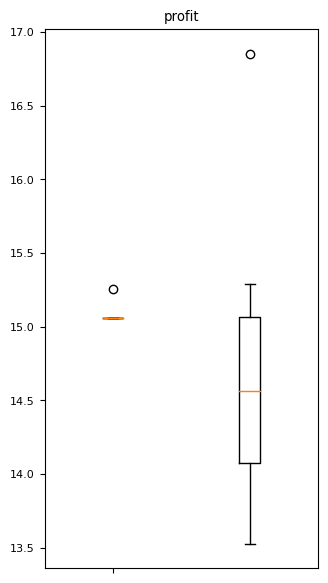

In [52]:
plt.subplot(131)
plt.title("profit")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 8
plt.boxplot([sa_profit_list,profit_random])
#plt.boxplot([profit_random])
plt.xticks([1], [''])